In [20]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import scipy.stats as stats 
from pprint import pprint 

def pp(x, *args):
    pprint(x) if not args else (pprint(x), pp(*args))

In [56]:
# https://towardsdatascience.com/conjugate-prior-explained-75957dc80bfb

# X: the evidence/data, generated with theta=0.3
theta = 0.3 
data = np.random.binomial(n=1, p=theta, size=1000)
pp(data.shape)
pp(data[:10])
np.sum(data) / data.size


(1000,)
array([1, 1, 0, 1, 0, 0, 0, 0, 1, 1])


0.297

In [57]:
# x: quantiles
stats.norm.cdf(x=0)

0.5

array([0.      , 0.001001, 0.002002, 0.003003, 0.004004])
array([0.1     , 0.101001, 0.102002, 0.103003, 0.104004])


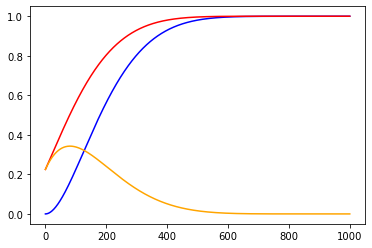

In [53]:
# Prior Pdf(theta) as fx
# E[Pdf(theta)] ~ 0.1

# Domain theta 
N = np.linspace(0, 1, 1000)
pp(N[:5], N[:5]+0.1)
a, b = 2, 8 
eps = 0.1#1e-4
cdf_theta_2 = stats.beta.cdf(x=N+eps, a=a, b=b)
cdf_theta_1 = stats.beta.cdf(x=N, a=a, b=b)
p_theta = cdf_theta_2 - cdf_theta_1
# cdf1: probabilities from 0th to 100th quantile
# cdf2: probabilities from 0.1th to 100.1th quantile 
# 
# The diff between each P(X=quantile) gives probability 
# for that point, which we can then plot to see Pdf(theta)
_, a = plt.subplots(1,1)
a.plot(cdf_theta_1, c='b'); a.plot(cdf_theta_2, c='r')
a.plot(p_theta, c='orange')



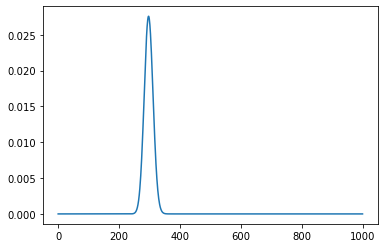

In [59]:
# Likelihood (sampling dist) = p(X|theta)
# Make the PMF from the data
p_X_theta_dist = stats.binom.pmf(
    k=np.sum(data), n=len(data), p=N)
# E[p(X|theta) ~ 0.3]
plt.plot(p_X_theta_dist)


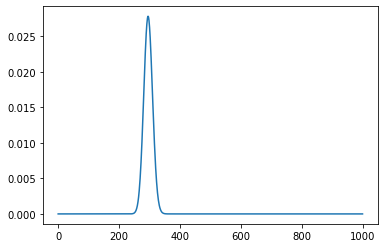

In [61]:
# Now get posterior 
posterior = p_theta * p_X_theta_dist
posterior /= np.sum(posterior)

# Updates to 0.3
plt.plot(posterior)  
